# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [8]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


In [4]:
data

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0    12669   9656     7561     214              2674          1338
1     7057   9810     9568    1762              3293          1776
2     6353   8808     7684    2405              3516          7844
3    13265   1196     4221    6404               507          1788
4    22615   5410     7198    3915              1777          5185
5     9413   8259     5126     666              1795          1451
6    12126   3199     6975     480              3140           545
7     7579   4956     9426    1669              3321          2566
8     5963   3648     6192     425              1716           750
9     6006  11093    18881    1159              7425          2098
10    3366   5403    12974    4400              5977          1744
11   13146   1124     4523    1420               549           497
12   31714  12319    11757     287              3881          2931
13   21217   6208    14982    3095              6707           602
14   24653   9465    12091     294              5058          2168
15   10253   1114     3821     397               964           412
16    1020   8816    12121     134              4508          1080
17    5876   6157     2933     839               370          4478
18   18601   6327    10099    2205              2767          3181
19    7780   2495     9464     669              2518           501
20   17546   4519     4602    1066              2259          2124
21    5567    871     2010    3383               375           569
22   31276   1917     4469    9408              2381          4334
23   26373  36423    22019    5154              4337         16523
24   22647   9776    13792    2915              4482          5778
25   16165   4230     7595     201              4003            57
26    9898    961     2861    3151               242           833
27   14276    803     3045     485               100           518
28    4113  20484    25957    1158              8604          5206
29   43088   2100     2609    1200              1107           823
..     ...    ...      ...     ...               ...           ...
410   6633   2096     4563    1389              1860          1892
411   2126   3289     3281    1535               235          4365
412     97   3605    12400      98              2970            62
413   4983   4859     6633   17866               912          2435
414   5969   1990     3417    5679              1135           290
415   7842   6046     8552    1691              3540          1874
416   4389  10940    10908     848              6728           993
417   5065   5499    11055     364              3485          1063
418    660   8494    18622     133              6740           776
419   8861   3783     2223     633              1580          1521
420   4456   5266    13227      25              6818          1393
421  17063   4847     9053    1031              3415          1784
422  26400   1377     4172     830               948          1218
423  17565   3686     4657    1059              1803           668
424  16980   2884    12232     874              3213           249
425  11243   2408     2593   15348               108          1886
426  13134   9347    14316    3141              5079          1894
427  31012  16687     5429   15082               439          1163
428   3047   5970     4910    2198               850           317
429   8607   1750     3580      47                84          2501
430   3097   4230    16483     575               241          2080
431   8533   5506     5160   13486              1377          1498
432  21117   1162     4754     269              1328           395
433   1982   3218     1493    1541               356          1449
434  16731   3922     7994     688              2371           838
435  29703  12051    16027   13135               182          2204
436  39228   1431      764    4510                93          2346
437  14531  15488    30243     437             14841

**Features**
1. `Fresh`: annual spending (m.u.) on fresh products (Continuous); 
2. `Milk`: annual spending (m.u.) on milk products (Continuous); 
3. `Grocery`: annual spending (m.u.) on grocery products (Continuous); 
4. `Frozen`: annual spending (m.u.) on frozen products (Continuous);
5. `Detergents_Paper`: annual spending (m.u.) on detergents and paper products (Continuous);
6. `Delicatessen`: annual spending (m.u.) on and delicatessen products (Continuous); 
7. `Channel`: {Hotel/Restaurant/Cafe - 1, Retail - 2} (Nominal)
8. `Region`: {Lisbon - 1, Oporto - 2, or Other - 3} (Nominal) 

## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

## To study the data distribution

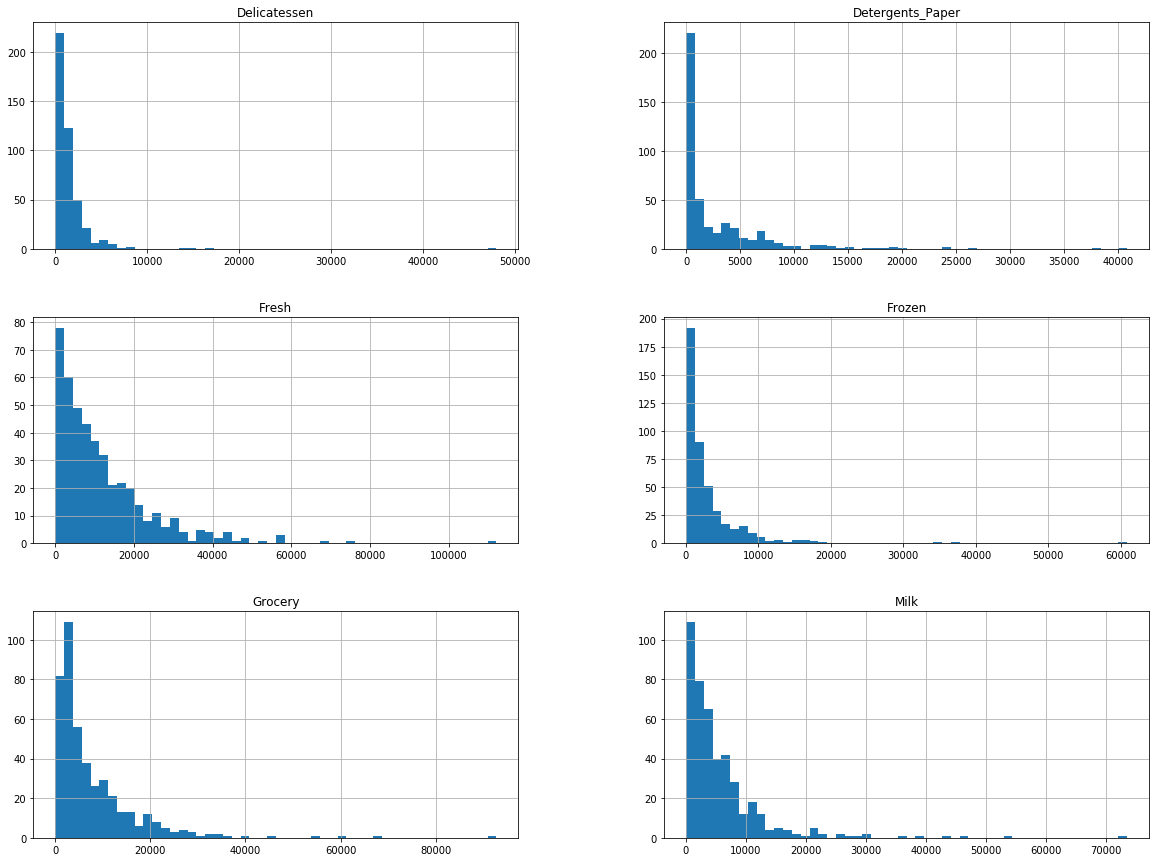

In [9]:
data.hist(bins = 50, figsize = (20,15))
plt.show()

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [22]:
data[data['Frozen']>10000]

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
39    56159    555      902   10002               212          2916
70    16705   2037     3202   10643               116          1365
93    11314   3090     2062   35009                71          2698
103   56082   3504     8906   18028              1480          2498
125   76237   3473     7102   16538               778           918
181  112151  29627    18148   16745              4948          8550
183   36847  43950    20170   36534               239         47943
196   30624   7209     4897   18711               763          2876
240   22096   3575     7041   11422               343          2564
265    5909  23527    13699   10155               830          3636
277    9061    829      683   16919               621           139
283   25767   3613     2013   10303               314          1384
310    7034   1492     2405   12569               299          1117
325   32717  16784    13626   60869              1272          5609
334   16823    928     2743   11559               332          3486
338       3    333     7021   15601                15           550
401   27167   2801     2128   13223                92          1902
413    4983   4859     6633   17866               912          2435
425   11243   2408     2593   15348               108          1886
427   31012  16687     5429   15082               439          1163
431    8533   5506     5160   13486              1377          1498
435   29703  12051    16027   13135               182          2204

In [23]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [29,183,418]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  43088   2100     2609    1200              1107           823
1  36847  43950    20170   36534               239         47943
2    660   8494    18622     133              6740           776

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

#### Sample Customers:

1. Sample Point 0: **Restaurant** because the number of *Fresh* products expenditure, 43088 is in the 3rd quartile of the distribution. The number for *Grocery*, *Milk*, and *Frozen* lies in the 1st quartile to median range which says that these purchases are as per norm.

2. Sample Point 1: **Cafes/Restaurant** the expenditure numbers for *Delicatessen*, *Fresh*, *Milk*, *Grocery* and *Frozen* are all above median and in the 3rd quartile but detergent is low, in the 1st quartile.

3. Sample Point 2: **Fresh Market/Retailer** because of the high expenditure number for *Grocery*, *Detergent_Paper* and *Milk*.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [37]:
#Import 'train_test_split', Decision Tree and r2_score
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Detergents_Paper', axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Detergents_Paper'],test_size=0.25, random_state=2)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=2).fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
#score = r2_score(y_test, regressor.predict(X_test))
score = regressor.score(X_test, y_test)

display(score)

0.537024600300491

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

Predicted feature was **Detergents_Paper**.

The predicted score is 53.7%. No, from the positive scoring, the expenditure on *Detergents_Paper* can be predicted by using the other features, mainly because there is a correlation between this and other data. This feature is thus sort of redundant and can be ignored to predict customer behaviour.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

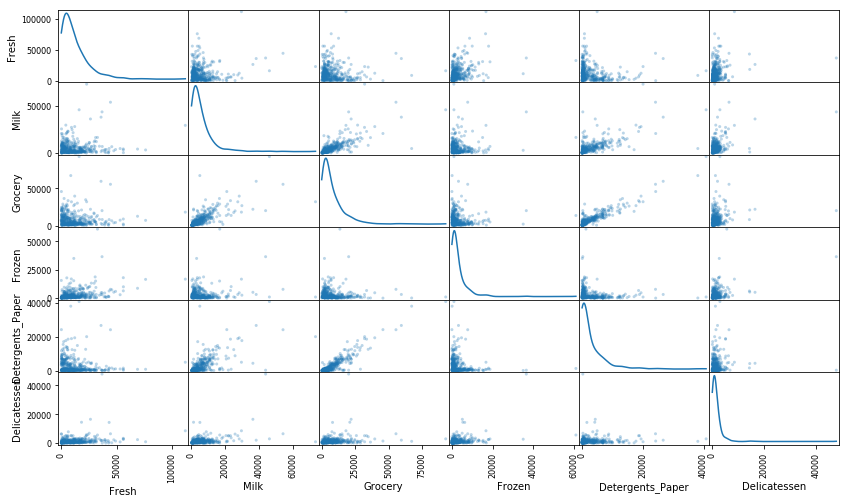

In [39]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

Yes, Detergents_Paper are somehow correlated with Grocery and Milk. And likewise, Grocery and Milk are correlated as well. All data are skewed distributions, which is confirmed by the histogram above as well as the scatter plot for each individual features. This skewness contributes to most data being scattered to the bottom left of the graphs.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

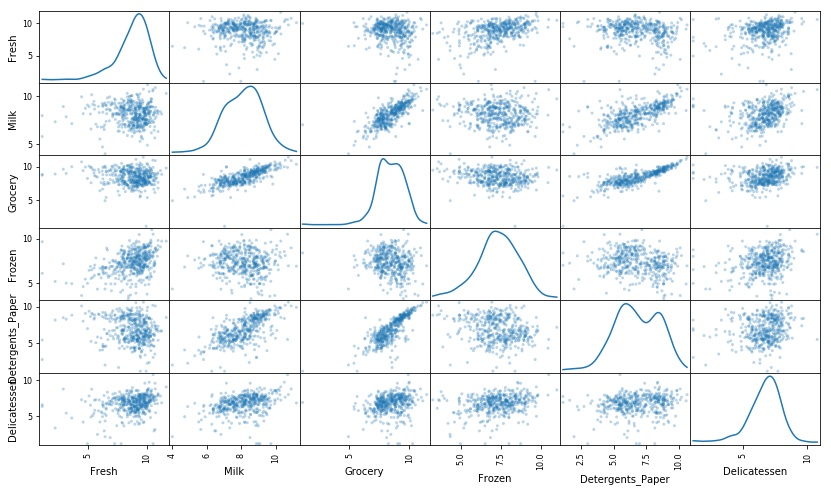

In [49]:
# TODO: Scale the data using the natural logarithm
log_data = data.apply(lambda x: np.log(x))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(x))

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

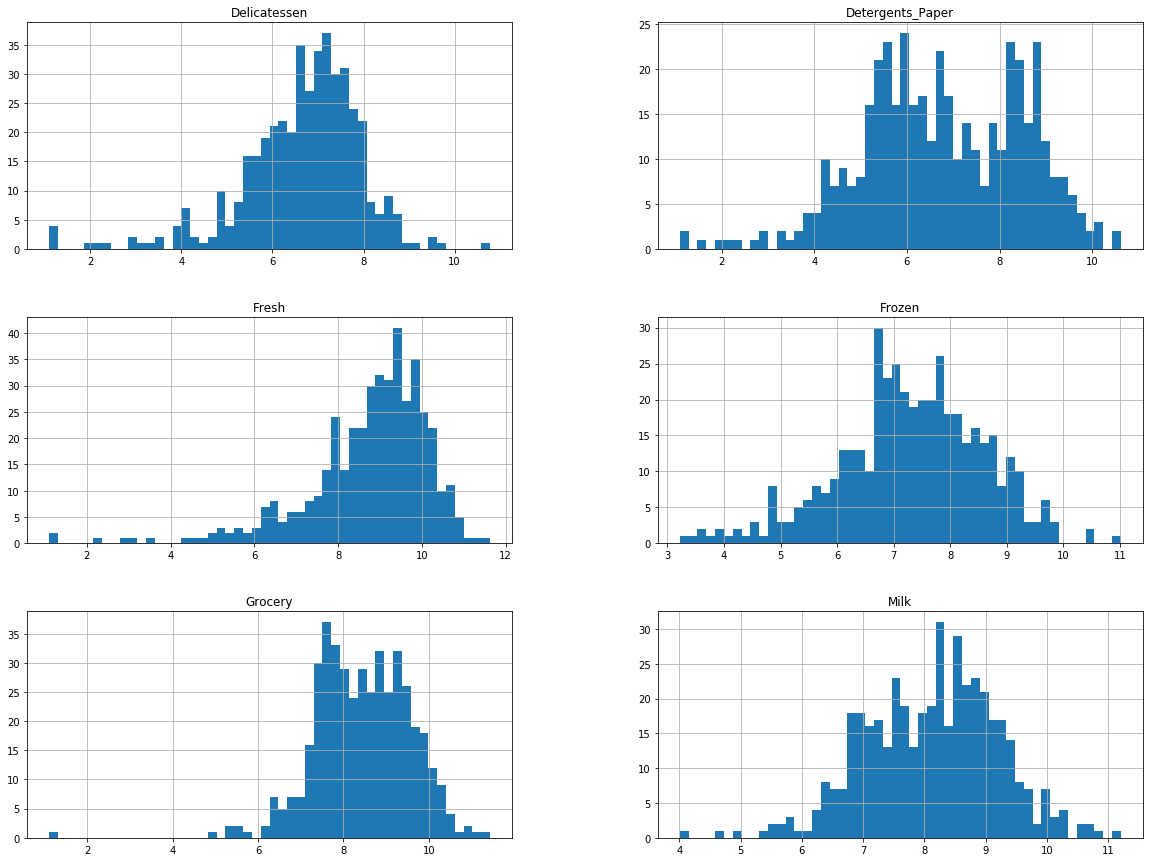

In [50]:
log_data.hist(bins = 50, figsize = (20,15))
plt.show()

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [51]:
# Display the log-transformed sample data
display(log_samples)

Fresh       Milk   Grocery     Frozen  Detergents_Paper  Delicatessen
0  10.671000   7.649693  7.866722   7.090077          7.009409      6.712956
1  10.514529  10.690808  9.911952  10.505999          5.476464     10.777768
2   6.492240   9.047115  9.832099   4.890349          8.815815      6.654153

In [52]:
log_data.describe()

Fresh        Milk     Grocery      Frozen  Detergents_Paper  \
count  440.000000  440.000000  440.000000  440.000000        440.000000   
mean     8.730544    8.121047    8.441169    7.301396          6.785972   
std      1.480071    1.081365    1.116172    1.284540          1.721020   
min      1.098612    4.007333    1.098612    3.218876          1.098612   
25%      8.048059    7.334981    7.674616    6.609678          5.548101   
50%      9.048286    8.196159    8.467057    7.330388          6.705018   
75%      9.737064    8.880480    9.273854    8.175896          8.274341   
max     11.627601   11.205013   11.437986   11.016479         10.617099   

       Delicatessen  
count    440.000000  
mean       6.665133  
std        1.310832  
min        1.098612  
25%        6.011875  
50%        6.872645  
75%        7.506728  
max       10.777768

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [64]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 0.25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 0.75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [122,128,142,154,161,338,356]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
170  5.560682   9.068201   9.505246  7.017506          8.855806      5.777652
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
342  5.541264   8.658345   8.686598  5.855072          8.432724      7.191429
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
39   10.935942  6.318968  6.804615  9.210540          5.356586      7.977968
88    8.970051  6.295266  8.304495  9.183483          5.105945      3.828641
97    5.998937  5.537334  6.413459  6.651572          3.988984      4.143135
98    6.220590  4.718499  6.656727  6.796824          4.025352      4.882802
122   9.410174  5.303305  5.501258  7.596392          3.218876      6.756932
154   6.432940  4.007333  4.919981  4.317488          1.945910      2.079442
161   9.428190  6.291569  5.645447  6.995766          1.098612      7.711101
186   8.009363  6.255750  6.749931  8.151910          6.855409      6.588926
191   9.519588  5.686975  7.230563  6.791221          3.761200      4.430817
219   8.332068  5.905362  7.237059  7.743270          4.454347      4.867534
238   8.904223  6.163315  6.371612  7.013915          4.276666      5.375278
247   9.515543  5.846439  6.192362  7.638680          3.784190      6.490724
255  10.361355  6.192362  7.309881  8.083946          4.709530      6.421622
269   9.630234  5.552960  7.037028  7.830426          5.808142      5.318120
289  10.663966  5.655992  6.154858  7.235619          3.465736      3.091042
338   1.098612  5.808142  8.856661  9.655090          2.708050      6.309918
356  10.029503  4.897840  5.384495  8.057377          2.197225      6.306275
369   8.734077  5.820083  6.526495  6.993015          3.713572      5.690359

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
122   9.410174  5.303305  5.501258  7.596392          3.218876      6.756932
131   7.650169  6.378426  5.749393  5.846439          4.248495      5.736572
154   6.432940  4.007333  4.919981  4.317488          1.945910      2.079442
161   9.428190  6.291569  5.645447  6.995766          1.098612      7.711101
275   6.522093  7.383989  5.407172  6.759255          4.564348      5.937536
356  10.029503  4.897840  5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703  3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892  3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651  3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143  3.737670          9.440738      8.396155
429   9.060331  7.467371   8.183118  3.850148          4.430817      7.824446

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75    9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
122   9.410174  5.303305  5.501258  7.596392          3.218876      6.756932
142  10.519646  8.875147  9.018332  8.004700          2.995732      1.098612
154   6.432940  4.007333  4.919981  4.317488          1.945910      2.079442
161   9.428190  6.291569  5.645447  6.995766          1.098612      7.711101
177   9.453992  8.899731  8.419139  7.468513          2.995732      7.875119
204   7.578657  6.792344  8.561401  7.232010          1.609438      7.191429
338   1.098612  5.808142  8.856661  9.655090          2.708050      6.309918
356  10.029503  4.897840  5.384495  8.057377          2.197225      6.306275
402  10.186371  8.466531  8.535230  5.393628          2.302585      5.828946

Data points considered outliers for the feature 'Delicatessen':


Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
109   7.248504  9.724899  10.274568  6.511745          6.728629      1.098612
128   4.941642  9.087834   8.248791  4.955827          6.967909      1.098612
142  10.519646  8.875147   9.018332  8.004700          2.995732      1.098612
187   7.798933  8.987447   9.192075  8.743372          8.148735      1.098612

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

There are a few data points that are considered outliers for more than one feature. For example, index number **122, 154, 161, 356** have all outliers for features *Milk*, *Grocery*, and *Detergents_Paper*. This is highly likely due to the correlation between these three items explained above. Other index points were **128, 142 and 338**. These points. should be removed from the dataset before proceeeding with the analysis as the data will be skewed otherwise. These numbers were added to the `outliers` variable for the reason explained above.

Interquatile range (IQR) is the difference between the 75th percentile and 25th percentile. For the setting above, it is the difference between Q3 and Q1. For example, if we look at *Fresh* feature under the log-transformed data, the 25th percentile is 8.048 and 75th percentile is 9.737. Hence, the IQR for *Fresh* feature is 1.689. By using Tukey's Method for identifying outliers, 1.5 times of this IQR is 2.5335. 

This means that any number/instance that falls below Q1 - 2.5335 = 5.5145 and any number that falls above Q3 + 2.5335 = 12.2705 will be classified as outliers and removed from the *Fresh* feature based on the definition above. In other words, any data that falls withing the range of 5.5145 < x < 12.2705 for *Fresh* feature will be considered good data. 

Following this methodology, 18 outliers were removed from *Fresh* and *Milk* features each, 6 outliers from *Grocery*, 5 outliers from *Frozen*, 10 outliers from *Detergents_Paper* and 4 outliers from *Delicatessen* features.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

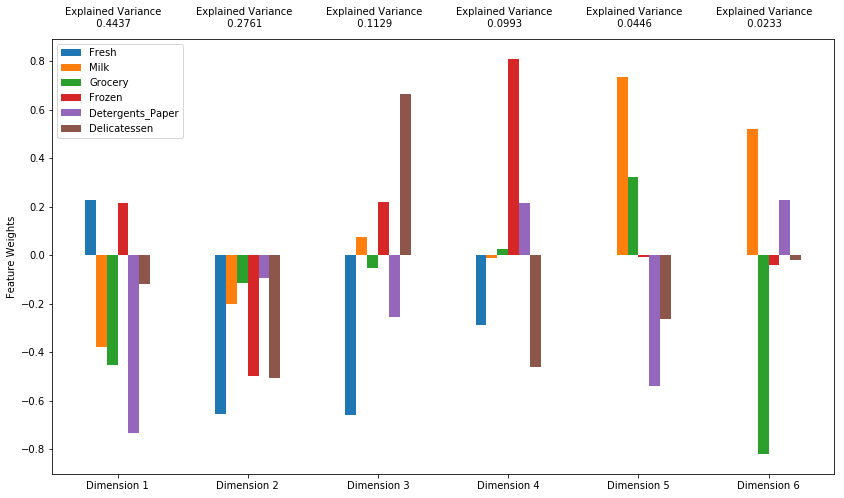

In [73]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA().fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

#### The feature weights vector square sums up to one. Each of the dimensions found by PCA is a linear combination of the p features. This feature weights vector will be transposed and multiplied with the Features to get each dimension. So for each PCA dimension, the feature weights vary. But the squared sum will be 1.

In [97]:
#The feature weights vector sums up to one. Each of the dimensions found by PCA is a linear combination
#of the p features
y=0
for x in pca.components_[0]:
    y += x**2
print y

0.9999999999999997


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

When only 2 components, or 2 dimensions were used with PCA method to reduce the dimensionality of the data, the total data represented is about 72%, or 72% of the variance in the dataset is explained by the new reduced dataset. When 4 dimensions were used, 93.2% of the data is explained by the new dataset.

From the visualization, it can be seen that the important dimensions that represent customer spending are ***Frozen***, ***Fresh***, ***Delicatessen*** and ***Detergents_Paper***. As we look at the feature weights for each components given by PCA,  we can see that more than 95% of data points are covered by the first four dimensions for ***Frozen*** and ***Fresh***. ***Delicatessen*** feature is mostly covered by the first four dimensions of PCA as well. The balance features are ***Milk***, ***Grocery***, and ***Detergents_Paper***. Most points for  ***Milk***, and  ***Grocery*** fall in the 5th and 6th dimension, but ***Detergents_Paper*** can be explained in the first four dimensions itself as seen from the visuals. Moreover, from the discussions above, we can see that ***Detergents_Paper*** are also correlated with ***Milk***, and  ***Grocery*** features.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [74]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0       0.7339      -1.0020      -1.3520      -0.7045      -0.6503   
1      -0.0004      -5.3788       2.7177      -0.0918       1.9801   
2      -3.4335       2.1868       0.4278      -0.8435       0.0659   

   Dimension 6  
0       0.2785  
1      -0.3881  
2      -0.1054

### Interpretation of the pca transformed sample

For example, sample 0 was interpreted to be a Fresh Market Retailer. 3rd Dimension of PCA, from the visuals above has a high negative feature weight for Fresh, and since the score for Dimension 3 of sample 0 is -1.352, of the highest magnitude among the other feature, we can conclude that the interpretation was correct.

In [104]:
#For example, score for sample 1 in Dimension 2.. This is a very negative score, showing it is highly inclined to 
#Fresh, Frozen, Delicatessen.
np.dot(np.transpose(pca.components_[1]),log_samples.iloc[0])

-17.056785971743775

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [76]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [77]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0       0.7339      -1.0020
1      -0.0004      -5.3788
2      -3.4335       2.1868

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

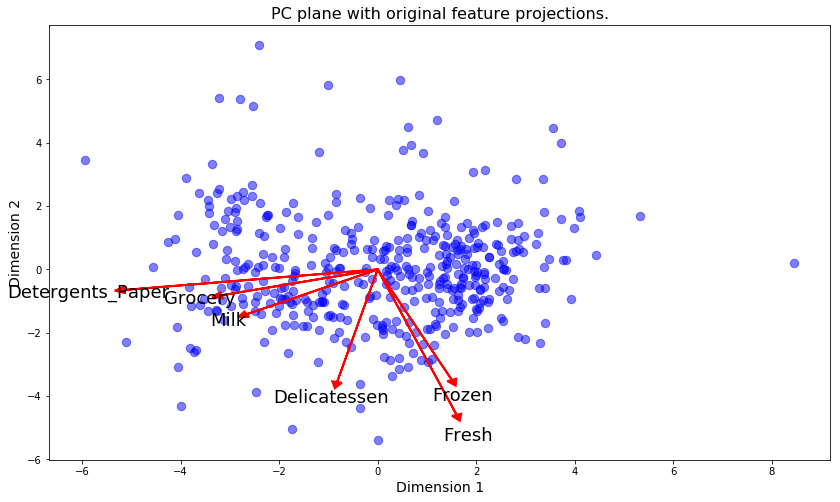

In [78]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower ~~right~~ left corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Answer**

Detergents_Paper, Grocery and Milk correspond more to Dimension 1 whereas Delicatessen, Frozen and Fresh correspond more to Dimension 2

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

1. **K-Means Clustering**

K-Means Clustering uses the distances between batches or centroids as its metric. The number of initial clusters specified is important to getting a good interpretation of the overall dataset. Hence, there ought to be a rough intuition about the dataset prior to using K-means algorithm.

Adjustable parameter: number of clusters

Scalability: Scalable to very large dataset

General usecases: flat geometry like a 2D plane, not too many clusters, general purposes

***References*** : [sklearn k-means clustering](http://scikit-learn.org/stable/modules/clustering.html#k-means)


2. **Gaussian Mixture Model**

Gaussian Mixture Model is more like a general k-means cluster model to incorporate information of covariance structure. The algorithm is fast and there is no bias the mean towards zero or cluster sizes. However, the algorithm may face convergence problem when there are many features, and will use all components it has access to inefficiently.

Adjustable parameter: many covariance types such as  {‘full’, ‘tied’, ‘diag’, ‘spherical’}

Scalability: Not scalable due to convergence problem

General usecases: flat geometry and density estimation

***References*** : [sklearn gaussian mixture clustering](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.predict)


Choice of clustering algorithm for this dataset is **k-means clustering** as it is a more specialized version of Gaussian Mixture Model and we know roughly there are two clusters for this dataset. We have also brought the dimensions down to two clusters, flat geometry and well suited for K-Means Clustering.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [133]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, random_state=0).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)

print score

0.4258483271554307


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

Silhoutte Scores for different number of clusters:

- n = 2 : 0.4258
- n = 3 : 0.4016
- n = 4 : 0.3341
- n = 5 : 0.3545
- n = 6 : 0.3606
- n = 10 : 0.3611
- n = 20 : 0.327
- n = 30 : 0.339

From the trials above, n_clusters = 2 has the best silhouette score, more than 0 and close to 1.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

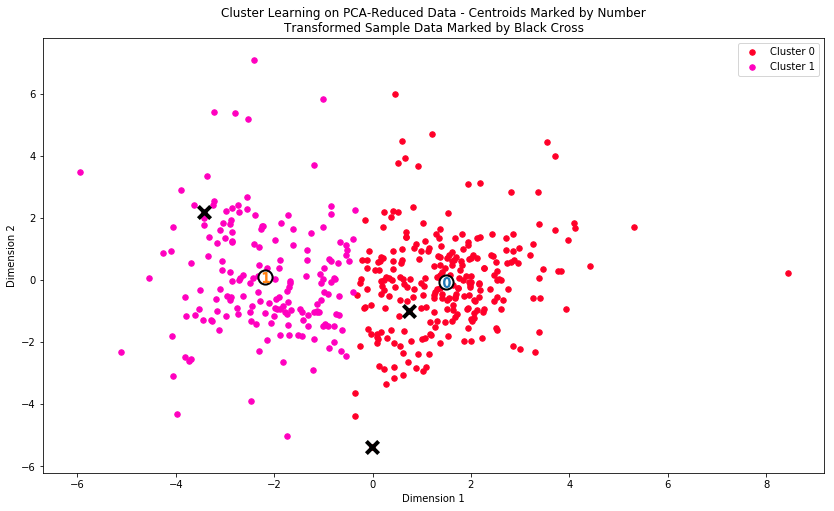

In [134]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [135]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  9243.0  1991.0   2442.0  2111.0             317.0         703.0
Segment 1  3632.0  7774.0  12609.0   893.0            4611.0        1005.0

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

**Segment 0**: Restaurants or hotel. If we look at the center points' numbers, the amount spent by customers who spend on these items are high and represent customers who may be in the restaurant business.

**Segment 1**: Fresh Market/ Grocery Retailers who sell Fresh items as well as for the high Milk, grocery, detergents_paper, and delicatessen. These customers spend more on these items for their businesses.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [136]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**

- Sample points 0 and 1 are predicted to be in Cluster 0 with K-Means clustering and reduced dimension data, which falls in Restaurants or Cafes or Hotels. From the predictions in Question 1, Sample points 0 and 1 were predicted to be Restaurant and Hotel respectively, so these items are consistent with the statistical intuition.

- Sample point 2 is in Cluster 1 under K-Means clustering algorithm and statistical prediction from Question 1 is Retailer. So this, again is consistent.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

At the moment, with the current resources of data points, we are unable to determine which group of customers will be affected by this changes in delivery service. As the data only represents numbers of amount spend per annum on different basic necessity, we shall assume that the changes will either affect all customers positively or all customers negatively. In other words, the changes will affect all customers equally with no bias.

For us to determine which group of customers will be affected by the service change, we must first identify the proper outcome or objective of the A/B test. Like for example, in this case, the definition would be to see whether the customers like or dislike to the changes in delivery services. Since there are two clusters: 1. Retail 2. Restaurants/Cafes; and two variants: (A) 5 days/week delivery (B) 3 days/week delivery.

To achieve this A/B test, We can probably choose 100 sample customers from Segment 0, deliver by Variant A and choose another 100 and deliver by Variant B. Repeat the same for Segment 1 customers. By seeing the response type of each customer segments, we can formulate which customer group is affected the most by this change in delivery service.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

This new ***engineered feature***  or **customer segment** feature will be the label or target variable for the new supervised learning model. This will be a classification supervised learning algorithm. The original dataset consisting of features of **Fresh**, **Milk**, **Grocery**, **Frozen**, **Detergents_Paper** or **Delicatessen** will be treated as the supervised learner's features or independent variables. 

The original dataset and this new engineered feature will then be split into training and testing feature using 80:20 rule and cross validation technique and the model will then be trained with this data. The trained model will be tested against this new customer's feature/estimated spending for each of the feature above. The Supervised Learning Model's accuracy can then be evaluated by using F-score to check how well the predicted customer segment is against the real customer segment.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

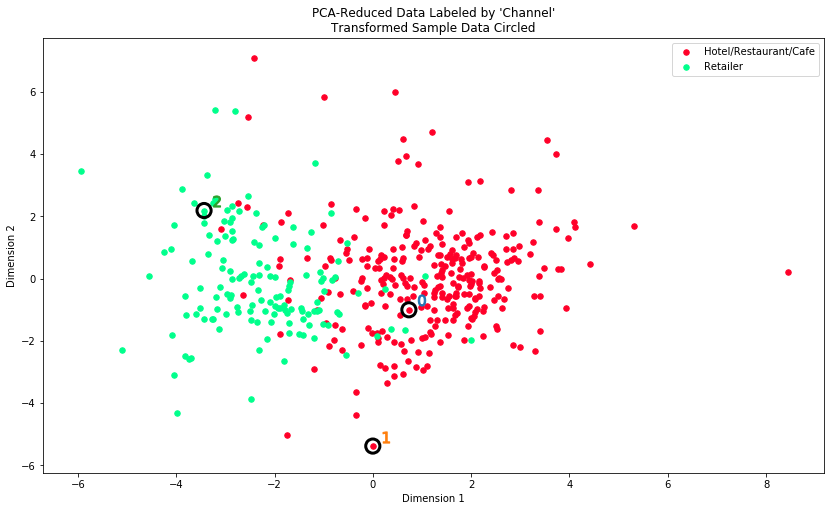

In [137]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

- The number of clustering algorithm choosen with the silhoutte score performance model is 2, which is consistent with this actual distribution. 
- Looking at this distribution, there are customers who can be identified as purely retailers or purely Restaurants/Hotels/Cafes. For example, if a data point falls towards the central left side of the scatter plot, the customer may most probably be a retailer and otherwise if the customer data falls on the right side of the scatter plot, the customer is most probably a Restaurant/Cafe/Hotel.
- These classifications are almost consistent with the K-means clustering algorithm using the PCA reduced dimension method. If we look at the sample points, they do fall under the same classification as the algorithm above. Although there are some points which are difficult to classify which cluster it belongs to as it kind of overlaps clusters, but the general model can be considered good in terms of performance and accuracy.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.